In [2]:
# importing basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# importing plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
# import ml libraries
from sklearn import ensemble
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# reading data
train_data = pd.read_csv(r'D:\Asha\Imp\ML\Data\blackfriday_train.csv')
test_data = pd.read_csv(r'D:\Asha\Imp\ML\Data\blackfriday_test.csv')

C:\Users\Ganesh\Anaconda4\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# checking shape of the data
train_data.shape , test_data.shape

# checking column types
'''ctype = train_data.dtypes.reset_index()
ctype.columns = ['Count', 'Column Type']
ctype.groupby('Column Type').aggregate('count').reset_index()'''
train_data.info() , test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    

(None, None)

In [4]:
# combining train & test data sets
train_data['source'] = 'train'
test_data['source'] = 'test'

data = pd.concat([train_data,test_data],axis=0,sort=False)

In [4]:
# displaying data header
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [5]:
# checking numerical data distribution
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# checking categorical data distribution
data.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,source
count,783667,783667,783667,783667,783667,783667
unique,3677,2,7,3,5,2
top,P00265242,M,26-35,B,1,train
freq,2709,590031,313015,329739,276425,550068


In [7]:
# checking missing values
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
11,Purchase,233599
9,Product_Category_2,245982
10,Product_Category_3,545809


In [35]:
# impute/treat missing values
#data['Product_Category_2'] = data.groupby('Product_Category_1').apply(lambda x:x.fillna(x.mean())).Product_Category_2
#data['Product_Category_3'] = data.groupby('Product_Category_1').apply(lambda x:x.fillna(x.mean())).Product_Category_3
data['Product_Category_2'] = data['Product_Category_2'].fillna(-999)
data['Product_Category_3'] = data['Product_Category_3'].fillna(-999)

C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ganesh\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


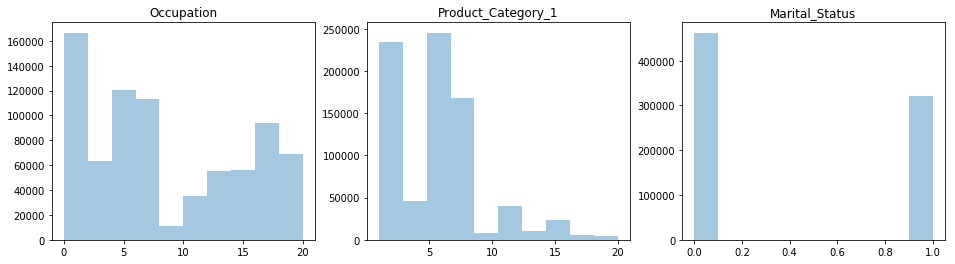

In [9]:
# univariate analysis for numerical variables
# histogram of numerical variables
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.title('Occupation')
sns.distplot(data['Occupation'].values, bins=10, kde=False)
plt.subplot(132)
plt.title('Product_Category_1')
sns.distplot(data['Product_Category_1'].values, bins=10, kde=False)
plt.subplot(133)
plt.title('Marital_Status')
sns.distplot(data['Marital_Status'].values, bins=10, kde=False)
plt.show()

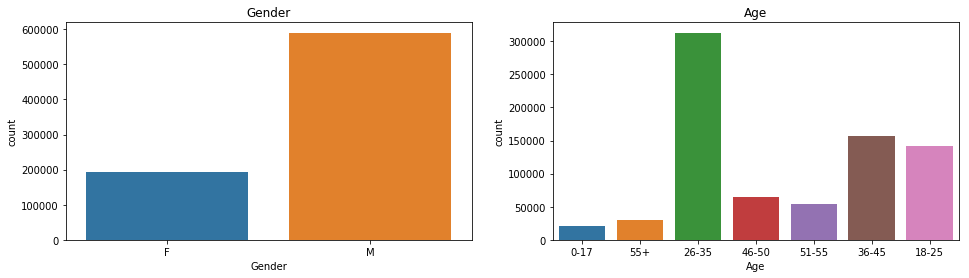

In [10]:
# bar chart of categorical variables
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('Gender')
sns.countplot(data['Gender'],data=data)
plt.subplot(122)
plt.title('Age')
sns.countplot(data['Age'],data=data)
plt.show()

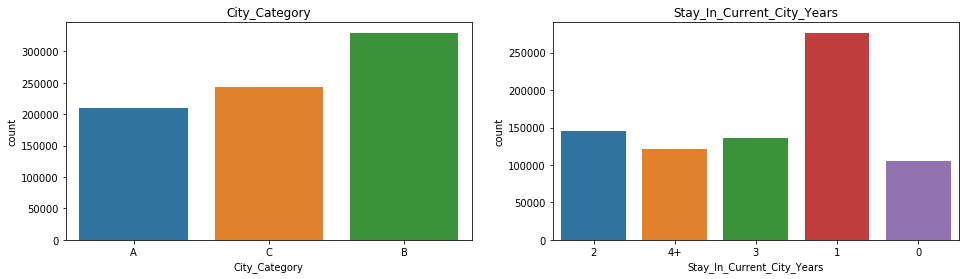

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title('City_Category')
sns.countplot(data['City_Category'],data=data)
plt.subplot(122)
plt.title('Stay_In_Current_City_Years')
sns.countplot(data['Stay_In_Current_City_Years'],data=data)
plt.show()

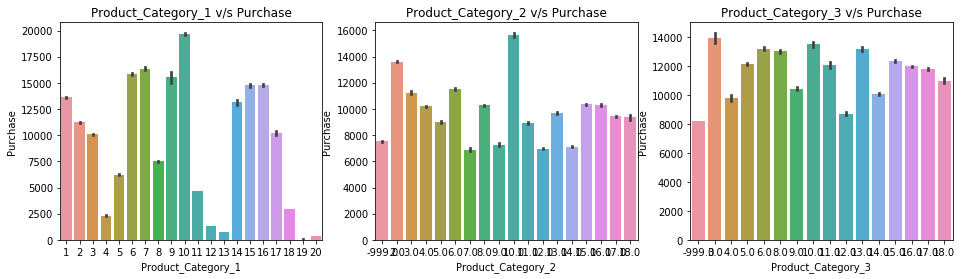

In [12]:
# bivariate analysis
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.title('Product_Category_1 v/s Purchase')
sns.barplot(x='Product_Category_1', y='Purchase', data=data) 
plt.subplot(132)
plt.title('Product_Category_2 v/s Purchase')
sns.barplot(x='Product_Category_2', y='Purchase', data=data) 
plt.subplot(133)
plt.title('Product_Category_3 v/s Purchase')
sns.barplot(x='Product_Category_3', y='Purchase', data=data) 
plt.show()

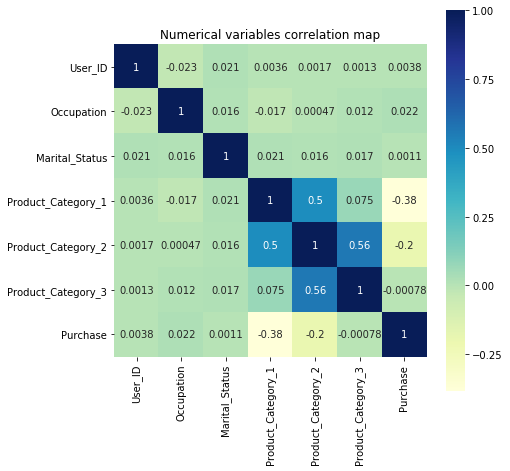

In [24]:
# multivariate analysis of numerical variables
temp = data[['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']]
corrmat = temp.corr(method='spearman')
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=1., square=True, cmap='YlGnBu', annot=True)
plt.title('Numerical variables correlation map', fontsize=12)
plt.show()

In [14]:
# Updating Categorical variables to numeric

data['Gender'] = data['Gender'].map({'M':1,'F':0}).astype(int)

data['City_Category'] = data['City_Category'].map({'A':1,'B':2,'C':3}).astype(int)

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4}).astype(int)

data['Age'] = data['Age'].map({'0-17':16,'18-25':24,'26-35':34, '36-45':44,'46-50':50, '51-55':55, '55+':60}).astype(int)


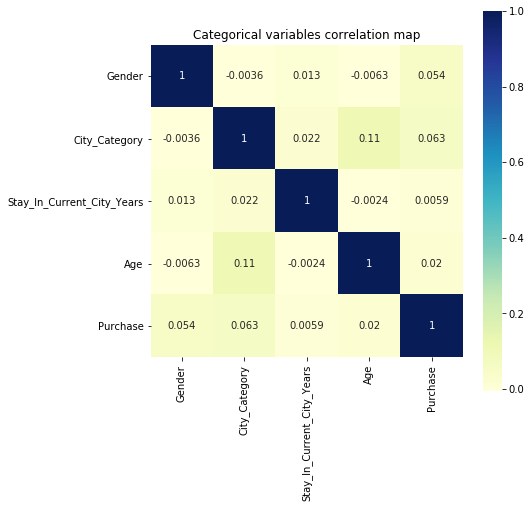

In [26]:
# multivariate analysis of categorical variables
temp = data[['Gender','City_Category','Stay_In_Current_City_Years','Age','Purchase']]
corrmat = temp.corr(method='spearman')
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=1., square=True, cmap='YlGnBu', annot=True)
plt.title('Categorical variables correlation map', fontsize=12)
plt.show()

In [27]:
# Feature Engineering .. Adding few additonal columns

data.groupby('User_ID').size() , data.groupby('Product_ID').size()
# User ID and Product ID have large numbers of levels. These two variables could have high impact on target variable prediction.
# Creating new columns based on these two fields

# Generic fuction to get the count of variables
def get_cnt (df,var):
    # Adding the count into a dictionary
    Grp_User = data.groupby(var)
    count_dict = {}
    for name, group in Grp_User:
        count_dict[name] = group.shape[0]
        
    # Returning a list having count of variable against each row    
    count_list = []
    for index, row in data.iterrows():
        name = row[var]
        count_list.append(count_dict.get(name, 0))
    return count_list

# Generic fuction to get the average purchase
def get_purchase (df,var):
    Grp_df = data.groupby(var)
    mean_dict = {}
    for name, group in Grp_df:
        mean_dict[name] = np.mean(group['Purchase'])        
    # Returning a list having average purchase against each row    
    avg_list = []
    for index, row in data.iterrows():
        name = row[var]
        avg_list.append(mean_dict.get(name, 0))
    return avg_list

# Adding user count column
data['User_Count'] = get_cnt(data,'User_ID')

# Adding product count 
data['Product_Count'] = get_cnt(data,'Product_ID')

# Adding average purchase of each user
data['Avg_Purchase_User'] = get_purchase(data,'User_ID')

# Adding average purchase of each product
data['Avg_Purchase_Product'] = get_purchase(data,'Product_ID')

In [ ]:
data.corr()

In [39]:
# Applying Label Encoder for converting Product ID to numeric
Le = LabelEncoder()
data['Product_ID'] = Le.fit_transform(data['Product_ID'])

# Splitting to Train and Test
d_train = data.loc[data.source=='train']
d_test = data.loc[data.source=='test']

d_train.drop(['source'],axis=1,inplace=True)
d_test.drop(['source'],axis=1,inplace=True)

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

Linear Regression RMSE :  2548.822934596593
Decision Tree RMSE :  3527.8563695555804
Random Forest RMSE :  2612.665869781576
Gradient Boosting RMSE :  2509.8490059162705


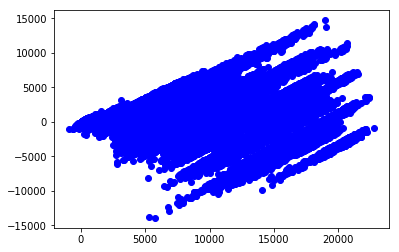

In [54]:
# build models & evaluate

X = d_train.loc[:,d_train.columns != 'Purchase']
Y = d_train.loc[:,'Purchase']
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 7)

lr = LinearRegression()
lr.fit( x_train, y_train)
predicted = lr.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test , predicted))
print('Linear Regression RMSE : ',mse)

dtr = DecisionTreeRegressor()
dtr.fit( x_train, y_train)
predicted = dtr.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test , predicted))
print('Decision Tree RMSE : ',mse)

rfr = RandomForestRegressor()
rfr.fit( x_train, y_train)
predicted = rfr.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test , predicted))
print('Random Forest RMSE : ',mse)

gbr = GradientBoostingRegressor()
gbr.fit( x_train, y_train)
predicted = gbr.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test , predicted))
print('Gradient Boosting RMSE : ',mse)

In [43]:
params = {}
params["objective"] = "reg:linear"
params["eta"] = 0.05
params["min_child_weight"] = 10
params["subsample"] = 0.8
params["colsample_bytree"] = 0.7
params["silent"] = 1
params["max_depth"] = 10
#params["max_delta_step"]=2
params["seed"] = 0
#params['eval_metric'] = "auc"
plst = list(params.items())
num_rounds = 750

xgtrain = xgb.DMatrix(x_train, label=y_train)
xgtest = xgb.DMatrix(x_test)
model = xgb.train(plst, xgtrain, num_rounds)
predicted = model.predict(xgtest)

mse = np.sqrt(mean_squared_error(y_test , predicted))
print('Xtreme Gradient Boosting RMSE : ',mse)

2418.4576517552036

Text(0.5,1,'Residual plot')

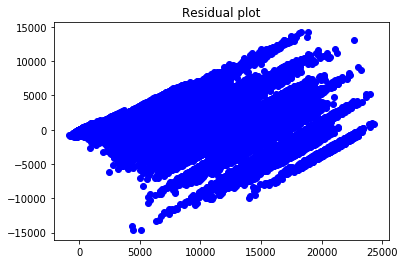

In [52]:
# Plot residual Plot
x_plot = plt.scatter(predicted, (predicted - y_test), c='b') 
plt.title('Residual plot')
# No heteroscedasticity exists 

In [53]:
#Conclusion: XG Boost gives the best rmse score.